<a href="https://colab.research.google.com/github/sipocz/_dengue/blob/main/_dengue_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:

#_Dengue
_project="_dengue"
_PCVERSION_=False
_GITHUBVERSION_=True
_GOOGLEVERSION_=False
if _PCVERSION_:
    basedir="C:/Users/sipocz/OneDrive/Dokumentumok/GitHub"

if _GOOGLEVERSION_:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    basedir="/content/drive/My Drive/001_AI"

if _GITHUBVERSION_:
    !mkdir _dengue
    files=["dengue_features_train.csv","dengue_labels_train.csv","dengue_features_test.csv"]
    path="https://raw.githubusercontent.com/sipocz/_dengue/main/"
    basedir="./"
    storeto=basedir+_project
    for f in files:
        fname=path+f
        !rm $f
        !wget $fname
        !mv $f $storeto



mkdir: cannot create directory ‘_dengue’: File exists
rm: cannot remove 'dengue_features_train.csv': No such file or directory
--2021-08-02 14:11:22--  https://raw.githubusercontent.com/sipocz/_dengue/main/dengue_features_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287139 (280K) [text/plain]
Saving to: ‘dengue_features_train.csv’

dengue_features_tra 100%[===================>] 280.41K  --.-KB/s    in 0.02s   

2021-08-02 14:11:22 (13.1 MB/s) - ‘dengue_features_train.csv’ saved [287139/287139]

rm: cannot remove 'dengue_labels_train.csv': No such file or directory
--2021-08-02 14:11:23--  https://raw.githubusercontent.com/sipocz/_dengue/main/dengue_labels_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.13

In [39]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#--------------scikit import 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#--------------
def outlierStatistic(X_train_predict):
    print(X_train_predict)
    maxX=len(X_train_predict)
    outlier=0
    for i in X_train_predict:
        if i==-1:
            outlier+=1
    print(f"A összes ({maxX} darabból {outlier} darab outlier van. Az {outlier/maxX*100:5.1f} %.)")

features_train=basedir+_project+"/"+"dengue_features_train.csv"
labels_train=basedir+_project+"/"+"dengue_labels_train.csv"
features_test=basedir+_project+"/"+"dengue_features_test.csv"


X_train=pd.read_csv(features_train)
y_train=pd.read_csv(labels_train)
X_test=pd.read_csv(features_test)








In [40]:
X_test.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [41]:
len(list(X_test[X_test.isnull().T.any().T]))

24

In [42]:
X_test[X_test.isnull().T.any().T].head(124)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
7,sj,2008,25,2008-06-17,NaN,0.082150,0.144371,0.116729,30.81,300.484286,300.578571,295.997143,303.5,297.5,7.20,76.870000,30.81,17.420000,3.900000,28.757143,6.985714,34.4,24.4,0.3
11,sj,2008,29,2008-07-15,NaN,NaN,0.195843,0.176157,4.34,300.448571,300.607143,296.177143,302.3,298.7,5.49,77.615714,4.34,17.571429,2.614286,28.785714,5.014286,31.7,26.1,0.0
15,sj,2008,33,2008-08-12,NaN,NaN,0.058900,0.065643,4.28,301.150000,301.285714,296.912857,303.3,299.0,7.82,77.968571,4.28,18.418571,2.742857,29.214286,6.342857,33.9,25.0,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,iq,2011,28,2011-07-16,0.330200,0.334843,0.324957,0.319843,19.52,295.554286,296.464286,293.251429,305.5,290.6,25.70,88.778571,19.52,14.787143,9.271429,NaN,NaN,31.8,19.5,21.1
318,iq,2011,32,2011-08-13,0.322914,0.334943,0.293471,0.335500,7.30,297.454286,299.050000,294.522857,307.9,290.9,79.90,86.355714,7.30,16.032857,11.642857,27.020000,11.560000,34.2,20.4,NaN
339,iq,2012,1,2012-01-08,0.220886,0.235729,0.260271,0.321814,55.26,296.638571,297.200000,296.134286,303.1,293.8,140.80,97.435714,55.26,17.765714,5.800000,NaN,NaN,32.8,22.6,35.3
370,iq,2012,32,2012-08-12,0.289500,0.300171,0.239743,0.308771,16.38,297.657143,298.828571,292.920000,307.9,289.3,8.90,77.642857,16.38,14.560000,13.114286,27.000000,13.400000,34.2,18.3,NaN


In [43]:
X_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [44]:
y_train

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [45]:
X_train["total_cases"]=y_train["total_cases"]

In [46]:

X_train_sj=X_train[X_train.city == "sj"]
X_train_iq=X_train[X_train.city == "iq"]


In [47]:

X_test_sj=X_test[X_test.city == "sj"]
X_test_iq=X_test[X_test.city == "iq"]

In [48]:
X_train_sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [49]:
print(X_train_sj.head())
print(X_train_sj.tail())


  city  year  weekofyear  ... station_min_temp_c  station_precip_mm  total_cases
0   sj  1990          18  ...               20.0               16.0            4
1   sj  1990          19  ...               22.2                8.6            5
2   sj  1990          20  ...               22.8               41.4            4
3   sj  1990          21  ...               23.3                4.0            3
4   sj  1990          22  ...               23.9                5.8            6

[5 rows x 25 columns]
    city  year  weekofyear  ... station_min_temp_c  station_precip_mm  total_cases
931   sj  2008          13  ...               21.1                1.8            4
932   sj  2008          14  ...               22.2                0.5            3
933   sj  2008          15  ...               21.7               30.7            1
934   sj  2008          16  ...               21.7               11.2            3
935   sj  2008          17  ...               23.3                0.3       

In [50]:
print(X_test_sj.head())
print(X_test_sj.tail())

  city  year  ...  station_min_temp_c station_precip_mm
0   sj  2008  ...                21.7              75.2
1   sj  2008  ...                22.2              34.3
2   sj  2008  ...                22.8               3.0
3   sj  2008  ...                24.4               0.3
4   sj  2008  ...                23.3              84.1

[5 rows x 24 columns]
    city  year  ...  station_min_temp_c station_precip_mm
255   sj  2013  ...                22.8               3.5
256   sj  2013  ...                22.8              17.6
257   sj  2013  ...                23.3               9.4
258   sj  2013  ...                23.9              22.9
259   sj  2013  ...                21.7              47.5

[5 rows x 24 columns]


In [51]:
X_train.week_start_date.convert_dtypes()


0       1990-04-30
1       1990-05-07
2       1990-05-14
3       1990-05-21
4       1990-05-28
           ...    
1451    2010-05-28
1452    2010-06-04
1453    2010-06-11
1454    2010-06-18
1455    2010-06-25
Name: week_start_date, Length: 1456, dtype: string

In [52]:
correlation=X_train_sj.corr()

In [53]:
correlation["ndvi_se"]

year                                    -0.014863
weekofyear                              -0.009380
ndvi_ne                                  0.234049
ndvi_nw                                  0.196343
ndvi_se                                  1.000000
ndvi_sw                                  0.821354
precipitation_amt_mm                    -0.119386
reanalysis_air_temp_k                   -0.014601
reanalysis_avg_temp_k                   -0.011905
reanalysis_dew_point_temp_k             -0.062773
reanalysis_max_air_temp_k               -0.007382
reanalysis_min_air_temp_k               -0.045946
reanalysis_precip_amt_kg_per_m2         -0.130848
reanalysis_relative_humidity_percent    -0.114294
reanalysis_sat_precip_amt_mm            -0.119386
reanalysis_specific_humidity_g_per_kg   -0.058442
reanalysis_tdtr_k                        0.029358
station_avg_temp_c                      -0.056545
station_diur_temp_rng_c                  0.018121
station_max_temp_c                      -0.063718


In [54]:
X_train_sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


Text(0, 0, 'Hubert')

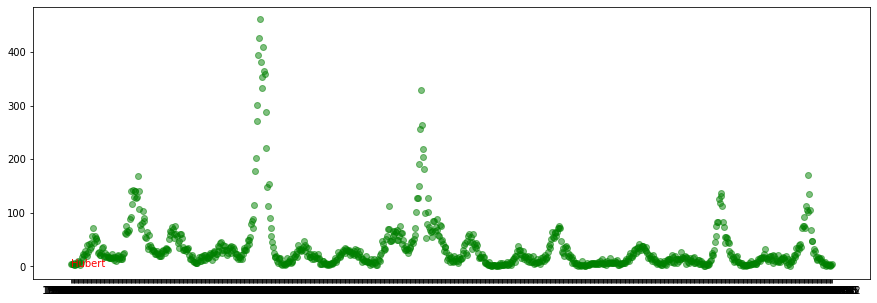

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(111)
#plt.scatter(indexer,,c="green",alpha=0.5)
plt.scatter(X_train_sj["week_start_date"],X_train_sj["total_cases"],c="green",alpha=0.5)
#plt.scatter(indexer,hubpred_no_outliers[:],c="red",alpha=0.5)
#plt.plot(df["Id"],diffihubert[:])
plt.text(0,0,"Hubert",c="red")

In [56]:
!rm visual_view.py
!wget https://raw.githubusercontent.com/sipocz/messer/main/visual_view.py
grafikon=None
from visual_view import grafikon
help(grafikon)

--2021-08-02 14:11:35--  https://raw.githubusercontent.com/sipocz/messer/main/visual_view.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1027 (1.0K) [text/plain]
Saving to: ‘visual_view.py’

visual_view.py      100%[===================>]   1.00K  --.-KB/s    in 0s      

2021-08-02 14:11:35 (67.3 MB/s) - ‘visual_view.py’ saved [1027/1027]

Help on function grafikon in module visual_view:

grafikon(fx, desc1, txt1, desc2='', txt2='', ngraf=2, c1='rgba(35,128,132,0.8)', c2='rgba(193,99,99,0.8)', title=None)
    fx: dataFrame
    desc1:column1
    txt1: label1
    desc2:column2
    txt2: label2
    ngraf: number of graph
    c1: color1
    c2: color2
    title: graph title



In [57]:
grafikon(X_train_sj,"total_cases","total_cases",ngraf=1,title="Adatok")

In [58]:
def grafikon(fx,ind,desc1,txt1,desc2="",txt2="",desc3="",txt3="",ngraf=2,c1='rgba(35,128,132,0.8)', c2='rgba(193,99,99,0.8)',c3='rgba(193,99,0,0.8)',title=None):
    '''
    fx: dataFrame
    ind: index
    desc1:column1
    txt1: label1
    desc2:column2
    txt2: label2
    ngraf: number of graph
    c1: color1
    c2: color2
    title: graph title
    '''
    
    #x_=[i for i in range(len(y_pred))]
    if title==None:
      title=txt1+txt2
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    fig0 = make_subplots(rows=1, cols=1)
    
    if True:
        fig0.add_trace(
            go.Scatter(x=fx[ind], y=fx[desc1], name=txt1, line=dict(color=c1) ,showlegend=True  ),

            row=1, col=1

        )
    
    if ngraf>1:
        fig0.add_trace(
            go.Scatter(x=fx[ind], y=fx[desc2], name=txt2, line=dict(color=c2) ,showlegend=True  ),

            row=1, col=1
        )
    if ngraf>2:
        fig0.add_trace(
            go.Scatter(x=fx[ind], y=fx[desc3], name=txt3, line=dict(color=c3) ,showlegend=True  ),

            row=1, col=1
        )



    fig0.update_layout(
        title=title,
        autosize=False,
        width=1200,
        height=600,
        
        )

    fig0.show()

In [59]:
grafikon(X_train_sj,"week_start_date","total_cases","total_cases","reanalysis_relative_humidity_percent","reanalysis_relative_humidity_percent","station_avg_temp_c","station_avg_temp_c",ngraf=3,title="Adatok")

In [60]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from statsmodels.tsa.seasonal import  seasonal_decompose

import matplotlib as mpl

In [61]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df=X_train_sj

data1 = seasonal_decompose(df["total_cases"][0:-1].values,model="additive", freq=51,) # 5 percenként vannak a minták
  

fig2 = make_subplots(rows=4, cols=1,shared_xaxes=True)
fig2.add_trace(
    go.Scatter(x=df.index[0:-1], y=data1.resid,name="Residual" ),

    row=1, col=1
)
fig2.add_trace(
    go.Scatter( x=df.index[0:-1], y=data1.trend,name="Trend"),

    row=2, col=1
)
fig2.add_trace(
    go.Scatter( x=df.index[0:-1], y=data1.seasonal,name="Seasonal"),

    row=3, col=1
)

fig2.add_trace(
    go.Scatter( x=df.index[0:-1], y=data1.observed,name="Observed"),

    row=4, col=1
)

fig2.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
)

fig2.show()



In [62]:
X_train_sj.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [63]:
prediktorok=['weekofyear',  'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

In [64]:
X_train_sj.isnull().sum()


city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

In [65]:
X_train_sj.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
from sklearn.linear_model import Lasso




alpha=0.00001
lassoreg = Lasso(alpha=alpha,normalize=False, max_iter=500, tol=0.0001)
lassoreg.fit(X_train_sj[prediktorok],X_train_sj[['total_cases']])
y_pred = lassoreg.predict(X_train_sj[prediktorok])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 398223.2195243417, tolerance: 94.77985254470426



In [67]:
y_pred=y_pred.T

In [68]:
X_train_sj["pred"]=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
grafikon(X_train_sj,"week_start_date","total_cases","total_cases","pred","pred",title="prediction",)

Ez a LAsso nem valami szép

In [70]:
X_train_sj.tail(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,pred
930,sj,2008,12,2008-03-18,0.04490,0.024450,0.101629,0.088000,0.00,297.404286,297.435714,292.205714,299.8,294.9,0.90,72.915714,0.00,13.737143,3.871429,25.200000,7.042857,30.0,20.6,0.5,3,5.131235
931,sj,2008,13,2008-03-25,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4,6.121775
932,sj,2008,14,2008-04-01,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3,3.919937
933,sj,2008,15,2008-04-08,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1,7.849755
935,sj,2008,17,2008-04-22,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,298.692857,294.280000,300.9,295.9,2.17,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3,5,10.108192


SJ random forest

In [71]:

from sklearn.ensemble import RandomForestRegressor

total_regressor=RandomForestRegressor(n_estimators=1540,criterion="mse",)

yy=X_train_sj[['total_cases']]
total_regressor.fit(X_train_sj[prediktorok],yy)
y_pred=total_regressor.predict(X_train_sj[prediktorok])

X_train_sj["Randomforest_total"]=y_pred




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
X_train_sj.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,pred,Randomforest_total
930,sj,2008,12,2008-03-18,0.04490,0.024450,0.101629,0.088000,0.00,297.404286,297.435714,292.205714,299.8,294.9,0.90,72.915714,0.00,13.737143,3.871429,25.200000,7.042857,30.0,20.6,0.5,3,5.131235,6.624675
931,sj,2008,13,2008-03-25,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4,6.121775,6.370779
932,sj,2008,14,2008-04-01,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3,3.919937,6.882468
933,sj,2008,15,2008-04-08,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1,7.849755,4.408442
935,sj,2008,17,2008-04-22,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,298.692857,294.280000,300.9,295.9,2.17,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3,5,10.108192,7.679221


In [104]:


from sklearn.ensemble import GradientBoostingRegressor

total_regressor=GradientBoostingRegressor(n_estimators=2000,verbose=1)

yy=X_train_sj[['total_cases']]
total_regressor.fit(X_train_sj[prediktorok],yy)
y_pred=total_regressor.predict(X_train_sj[prediktorok])

X_train_sj["Randomforest_total"]=y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



      Iter       Train Loss   Remaining Time 
         1        1220.8759           19.38s
         2        1153.4973           14.54s
         3        1097.6964           12.57s
         4        1050.3597           11.55s
         5        1015.6105           11.03s
         6         974.4072           10.62s
         7         945.8004           10.39s
         8         920.2258           10.31s
         9         891.2642           10.22s
        10         862.5312           10.07s
        20         674.1205            8.92s
        30         571.5918            8.47s
        40         503.9765            8.25s
        50         449.8532            8.43s
        60         405.2322            8.32s
        70         365.4816            8.19s
        80         333.5867            8.07s
        90         306.4352            7.97s
       100         283.5622            7.89s
       200         136.5207            7.63s
       300          70.4474            7.11s
       40

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
grafikon(X_train_sj,"week_start_date","total_cases","total_cases","Randomforest_total","Randomforest_total",title="GradientBoostingRegressor",)

In [109]:
X_train_train=X_train_sj[X_train_sj.index<900]
X_train_test=X_train_sj[X_train_sj.index>900]

from sklearn.ensemble import GradientBoostingRegressor

train_regressor=GradientBoostingRegressor(n_estimators=100,verbose=1)

yy=X_train_train[['total_cases']]
train_regressor.fit(X_train_train[prediktorok],yy)
y_pred=train_regressor.predict(X_train_train[prediktorok])

X_train_train["gradientboosting_total"]=y_pred


y_pred=train_regressor.predict(X_train_test[prediktorok])

X_train_test["gradientboosting_total"]=y_pred




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



      Iter       Train Loss   Remaining Time 
         1        1180.9372            0.38s
         2        1115.2002            0.40s
         3        1059.9158            0.42s
         4        1015.9876            0.42s
         5         970.1061            0.41s
         6         939.8860            0.41s
         7         911.8639            0.40s
         8         882.7006            0.40s
         9         855.0700            0.40s
        10         814.9373            0.40s
        20         649.2801            0.34s
        30         569.4584            0.29s
        40         513.5691            0.25s
        50         445.9537            0.21s
        60         400.0353            0.17s
        70         352.9005            0.12s
        80         318.9837            0.08s
        90         291.7849            0.04s
       100         263.4823            0.00s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
grafikon(X_train_test,"week_start_date","total_cases","total_cases","gradientboosting_total","gradientboosting_total",title="GradientBoostingRegressor",)

In [111]:
grafikon(X_train_train,"week_start_date","total_cases","total_cases","gradientboosting_total","gradientboosting_total",title="GradientBoostingRegressor",)

-Na-  estimation: Próbáljuk megbecsülni a hiányzó adatokat.

In [77]:
ndv=["ndvi_ne","ndvi_nw","ndvi_se","ndvi_sw"]

In [78]:
XX_ndv=X_train_sj[ndv]

In [79]:
XX_ndv

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
0,0.122600,0.103725,0.198483,0.177617
1,0.169900,0.142175,0.162357,0.155486
2,0.032250,0.172967,0.157200,0.170843
3,0.128633,0.245067,0.227557,0.235886
4,0.196200,0.262200,0.251200,0.247340
...,...,...,...,...
930,0.044900,0.024450,0.101629,0.088000
931,0.077850,-0.039900,0.310471,0.296243
932,-0.038000,-0.016833,0.119371,0.066386
933,-0.155200,-0.052750,0.137757,0.141214


In [80]:
ndv_features=["ndvi_nw","ndvi_se","ndvi_sw"]


In [113]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

ne_regressor=GradientBoostingRegressor(n_estimators=140)

yy=XX_ndv[['ndvi_ne']]
ne_regressor.fit(XX_ndv[ndv_features],yy)
y_pred=ne_regressor.predict(XX_ndv[ndv_features])







/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [82]:
XX_ndv["ne_pred"]=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
XX_ndv.head(10)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,ne_pred
0,0.122600,0.103725,0.198483,0.177617,0.105484
1,0.169900,0.142175,0.162357,0.155486,0.149980
2,0.032250,0.172967,0.157200,0.170843,0.088385
3,0.128633,0.245067,0.227557,0.235886,0.140847
4,0.196200,0.262200,0.251200,0.247340,0.197860
6,0.112900,0.092800,0.205071,0.210271,0.080853
7,0.072500,0.072500,0.151471,0.133029,0.056108
8,0.102450,0.146175,0.125571,0.123600,0.100167
10,0.192875,0.082350,0.191943,0.152929,0.146153
11,0.291600,0.211800,0.301200,0.280667,0.270566


In [84]:
XX_ndv["ssz"]=XX_ndv.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
grafikon(XX_ndv,"ssz","ndvi_ne","ndvi_ne","ne_pred","ne_pred",ngraf=2,title="NDVI_NE")

Gradient boosting NDVI

In [129]:
XX_ndv

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,ne_pred,ssz,nw_pred,gradientboosting_total,gradientboosting_ne
0,0.122600,0.103725,0.198483,0.177617,0.105484,0,0.109197,0.091673,0.112488
1,0.169900,0.142175,0.162357,0.155486,0.149980,1,0.138046,0.130928,0.163878
2,0.032250,0.172967,0.157200,0.170843,0.088385,2,0.125550,0.130773,0.027707
3,0.128633,0.245067,0.227557,0.235886,0.140847,3,0.214726,0.153834,0.129368
4,0.196200,0.262200,0.251200,0.247340,0.197860,4,0.236952,0.196546,0.192012
...,...,...,...,...,...,...,...,...,...
930,0.044900,0.024450,0.101629,0.088000,0.051807,930,0.029249,0.038819,0.049540
931,0.077850,-0.039900,0.310471,0.296243,0.026532,931,-0.002673,-0.003176,0.079571
932,-0.038000,-0.016833,0.119371,0.066386,-0.018980,932,-0.015736,0.001366,-0.028232
933,-0.155200,-0.052750,0.137757,0.141214,-0.092803,933,-0.031885,-0.074769,-0.149688


In [138]:
ne_regressor=GradientBoostingRegressor(n_estimators=3900,verbose=1)
X_ndv=XX_ndv[XX_ndv.index<800]
X_ndv_test=XX_ndv[XX_ndv.index>=800]

ndv_features=["ndvi_nw","ndvi_se","ndvi_sw"]
yy=X_ndv[['ndvi_ne']]

ne_regressor.fit(X_ndv[ndv_features],yy)
y_pred=ne_regressor.predict(X_ndv[ndv_features])
X_ndv["gradientboosting_ne"]=y_pred

y_pred=ne_regressor.predict(X_ndv_test[ndv_features])
X_ndv_test["gradientboosting_ne"]=y_pred



/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



      Iter       Train Loss   Remaining Time 
         1           0.0099            5.94s
         2           0.0090            5.89s
         3           0.0083            5.48s
         4           0.0077            5.51s
         5           0.0072            5.32s
         6           0.0068            5.19s
         7           0.0064            5.22s
         8           0.0061            5.13s
         9           0.0059            5.16s
        10           0.0057            5.10s
        20           0.0047            4.16s
        30           0.0041            4.03s
        40           0.0037            3.87s
        50           0.0035            3.77s
        60           0.0032            3.69s
        70           0.0030            3.64s
        80           0.0029            3.59s
        90           0.0027            3.55s
       100           0.0026            3.52s
       200           0.0016            3.22s
       300           0.0011            3.19s
       40

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
grafikon(X_ndv,"ssz","ndvi_ne","ndvi_ne","gradientboosting_ne","gradientboosting_ne",ngraf=2,title="gradientboosting_ne")
grafikon(X_ndv_test,"ssz","ndvi_ne","ndvi_ne","gradientboosting_ne","gradientboosting_ne",ngraf=2,title="gradientboosting_ne")


In [86]:
ndv_features=['ndvi_ne',"ndvi_se","ndvi_sw"]


In [87]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

nw_regressor=RandomForestRegressor(n_estimators=140)

yy=XX_ndv[['ndvi_nw']]
nw_regressor.fit(XX_ndv[ndv_features],yy)
y_pred=nw_regressor.predict(XX_ndv[ndv_features])







/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [88]:
XX_ndv["nw_pred"]=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
grafikon(XX_ndv,"ssz","ndvi_nw","ndvi_nw","nw_pred","nw_pred",ngraf=2,title="NDVI_NW")

In [90]:
ndv_features=["ndvi_nw","ndvi_se","ndvi_sw"]


### LSTM

In [140]:
from keras.layers import InputLayer, Dense, LSTM, Input, Dropout
from keras.models import Sequential, Model
from keras.optimizers import SGD,Adam,Adamax,Nadam,Ftrl,Adadelta,Adagrad,Nadam
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.backend import clear_session
from tensorflow.keras.losses import mean_absolute_percentage_error, huber,kld
#import tensorflow_addons as tfa

In [141]:
dropout_1_rate=0.7
inputs=Input(shape=(input_size,1))
lstm1=LSTM(input_size)(inputs)
layer2=Dense(180,activation="linear")(lstm1)
dropout1=Dropout(rate=dropout_1_rate)(layer2)
result=Dense(output_size)(dropout1)

model = Model(inputs=inputs, outputs=result)
model.compile(optimizer=Adamax(learning_rate=learning_rate), loss="mse")
model.summary()

NameError: ignored